In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np
import random

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [4]:
val_datasets_path = "../notebooks/datasets/validation/"
sub_dirs = os.listdir(val_datasets_path)
val_dataset_paths = [[val_datasets_path + sub_dir + "/" + sub_dir + ".csv", val_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
val_dataset_paths

[['../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv',
  '../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/frames/'],
 ['../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv',
  '../notebooks/datasets/validation/Nacht-Schneechaos/frames/']]

In [5]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16

In [6]:
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)

for train_dataset_path in train_dataset_paths:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Reading csv file: ../notebooks/datasets/train/

In [7]:
len(multi_train_dataset)

33574

In [8]:
multi_train_dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 3 rows for reason: No frame after cam latency compensation
Removing 2055 rows for reason: Low speed (< 25 km/h)
Removing 218 rows for reason: High SWA (> +45/ < -45 deg)
Removing 125 rows for reason: Left blinker on
Removing 1 rows for reason: Right blinker on
5694 samples remaining.
Cleaning dataset. Starting with 3775 samples.
Removing 3 rows for reason: No frame after cam latency compensation
Removing 1287 rows for reason: Low speed (< 25 km/h)
Removing 231 rows for reason: High SWA (> +45/ < -45 deg)
Removing 65 rows for reason: Left blinker on
Removing 138 rows for reason: Right blinker on
2051 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: High SWA (> +45/ < -45 deg)
Removing 0 rows for reason: Left blinker on
Removing 0 rows for reason: Right blinker on
0 samples rem

26529 samples remaining.
Cleaning dataset. Starting with 13594 samples.
Removing 3 rows for reason: No frame after cam latency compensation
Removing 906 rows for reason: Low speed (< 25 km/h)
Removing 547 rows for reason: High SWA (> +45/ < -45 deg)
Removing 90 rows for reason: Left blinker on
Removing 41 rows for reason: Right blinker on
12007 samples remaining.
Cleaning dataset. Starting with 25054 samples.
Removing 3 rows for reason: No frame after cam latency compensation
Removing 6873 rows for reason: Low speed (< 25 km/h)
Removing 356 rows for reason: High SWA (> +45/ < -45 deg)
Removing 105 rows for reason: Left blinker on
Removing 70 rows for reason: Right blinker on
17647 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: High SWA (> +45/ < -45 deg)
Removing 0 rows for reason: Left blinker on
Removing 0 rows for reason: Ri

In [9]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                         count       mean        std     min     25%     50%  \
steering_wheel_angle  434247.0  -0.986840  10.438353 -44.950  -4.130  -0.630   
speed                 434247.0  72.467608  31.012424  25.017  49.569  65.627   
blink_l               434246.0   0.000000   0.000000   0.000   0.000   0.000   
blink_r               434246.0   0.000000   0.000000   0.000   0.000   0.000   

                         75%      max  
steering_wheel_angle   2.250   44.950  
speed                 86.273  205.158  
blink_l                0.000    0.000  
blink_r                0.000    0.000  


In [10]:
multi_train_dataset.balance()

Balancing dataset. Starting with 5694 samples.
[28, 85, 33, 121, 148, 197, 351, 842, 1556, 984, 390, 339, 357, 97, 72, 52, 26, 16]
155
1918 samples remaining.
Balancing dataset. Starting with 2051 samples.
[20, 93, 65, 61, 130, 126, 171, 233, 195, 196, 251, 180, 76, 101, 48, 50, 28, 27]
173
1861 samples remaining.
Balancing dataset. Starting with 5474 samples.
[18, 32, 101, 144, 186, 318, 344, 338, 1483, 1201, 495, 274, 222, 110, 76, 68, 32, 32]
182
2251 samples remaining.
Balancing dataset. Starting with 201 samples.
[1, 12, 6, 37, 19, 33, 16, 13, 15, 16, 33, 0, 0, 0, 0, 0, 0, 0]
0
0 samples remaining.
Balancing dataset. Starting with 16503 samples.
[74, 111, 192, 247, 392, 589, 948, 2037, 5990, 3328, 1069, 387, 363, 282, 207, 136, 70, 81]
472
5374 samples remaining.
Balancing dataset. Starting with 1658 samples.
[20, 26, 25, 25, 24, 58, 142, 220, 495, 230, 95, 158, 67, 42, 31, 0, 0, 0]
44
545 samples remaining.
Balancing dataset. Starting with 1877 samples.
[11, 14, 15, 65, 75, 105, 

In [11]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                         count       mean        std     min     25%     50%  \
steering_wheel_angle  102344.0  -1.597402  19.293064 -44.950 -15.900  -0.940   
speed                 102344.0  58.234004  21.401381  25.017  44.392  54.529   
blink_l               102343.0   0.000000   0.000000   0.000   0.000   0.000   
blink_r               102343.0   0.000000   0.000000   0.000   0.000   0.000   

                         75%      max  
steering_wheel_angle  12.770   44.950  
speed                 67.952  205.158  
blink_l                0.000    0.000  
blink_r                0.000    0.000  


In [12]:
len(multi_train_dataset)

6396

In [13]:
val_datasets = []
for val_dataset_path in val_dataset_paths:
    val_dataset = RoadDataset(val_dataset_path[0], val_dataset_path[1], column_names, batch_size=my_batch_size)
    val_dataset.set_lateral_shift_range(0)
    val_dataset.clean()
    print()
    if len(val_dataset) > 0:
        val_datasets.append(val_dataset)
        

Reading csv file: ../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv
Loaded dataset with 10474 samples
Cleaning dataset. Starting with 10474 samples.
Removing 3 rows for reason: No frame after cam latency compensation
Removing 1202 rows for reason: Low speed (< 25 km/h)
Removing 541 rows for reason: High SWA (> +45/ < -45 deg)
Removing 66 rows for reason: Left blinker on
Removing 168 rows for reason: Right blinker on
8494 samples remaining.

Reading csv file: ../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv
Loaded dataset with 7527 samples
Cleaning dataset. Starting with 7527 samples.
Removing 3 rows for reason: No frame after cam latency compensation
Removing 1966 rows for reason: Low speed (< 25 km/h)
Removing 194 rows for reason: High SWA (> +45/ < -45 deg)
Removing 14 rows for reason: Left blinker on
Removing 39 rows for reason: Right blinker on
5311 samples remaining.



In [14]:
len(val_datasets)

2

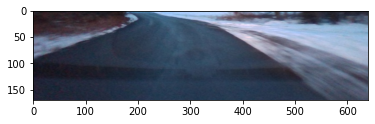

Vel: 44.113 km/h, SWA: 8.81605491720677 deg


In [15]:
import matplotlib.pyplot as plt
batch = multi_train_dataset[0]
samples = batch[0]
labels = batch[1]

images = samples[0]
velocities = samples[1]



image = images[0]
vel = velocities[0]
swa = labels[0]
swa = multi_train_dataset.denormalize_swa(swa)
plt.figure()
plt.imshow(image)
plt.grid(False)
plt.show()
print("Vel: {} km/h, SWA: {} deg".format(vel*250, swa))

In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import concatenate, ELU, Conv2D, MaxPooling2D, Dense, Flatten, Lambda, Dropout, BatchNormalization

ch, row, col = 3, 170, 640

frame_input = Input(shape=(row, col, ch), name='frame_in')
velocity_input = Input(shape=(1,), name='velocity_in')

# Image branch
x = Lambda(lambda x: x/127.5 - 1., input_shape=(row, col, ch), output_shape=(row, col, ch), name='frame_normalize')(frame_input)
x = MaxPooling2D(pool_size=(2,3), strides=(2,3), padding='valid', name='frame_downsample')(x)
    
x = Conv2D(filters=24, kernel_size=(5,5), strides=(3,3), activation='elu')(x)
#x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)
    
x = Conv2D(filters=36, kernel_size=(5,5), strides=(3, 3), activation='elu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)
    
#x = Conv2D(filters=48, kernel_size=(5,5), strides=(2, 2), activation='elu')(x)

#x = Conv2D(filters=64, kernel_size=(3,3), strides=(2, 1), activation='elu')(x)

x = Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), activation='elu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)

x = Flatten()(x)

x = Dense(50, activation='elu')(x)

x = Model(inputs=frame_input, outputs = x)

# Velocity branch
y = Dense(1, activation='linear')(velocity_input)
y = Model(inputs=velocity_input, outputs = y)


# Combine
combined = concatenate([x.output, y.output])

#combined = Dense(100, activation='elu')(combined)

#combined = Dense(50, activation='elu')(combined)

combined = Dense(10, activation='elu')(combined)

combined = Dense(1, activation='linear', name='swa_out')(combined)

model = Model(inputs=[x.input, y.input], outputs=combined)



model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [17]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
frame_in (InputLayer)           [(None, 170, 640, 3) 0                                            
__________________________________________________________________________________________________
frame_normalize (Lambda)        (None, 170, 640, 3)  0           frame_in[0][0]                   
__________________________________________________________________________________________________
frame_downsample (MaxPooling2D) (None, 85, 213, 3)   0           frame_normalize[0][0]            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 27, 70, 24)   1824        frame_downsample[0][0]           
____________________________________________________________________________________________

In [18]:
import numpy as np
import matplotlib.pylab as plt


def get_smoothness_score(series):
    
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    smooth = running_mean(series, 9)
    diff = series[4:-4] - smooth
    
    smoothness = 1/np.mean(np.abs(diff))
    print(smoothness)
    return smoothness

In [19]:
from tensorflow.keras.preprocessing.image import img_to_array
def dataset_thumbs(dataset):
    
    thumbs = 7
    frames = dataset.get_batch_size()*len(dataset)-1
    
    print("Dataset contains {} frames".format(frames))

    plt.figure(figsize=(15,3))
    for i in range(thumbs):
        framenr = frames//thumbs*i
        print("Getting frame {}".format(framenr))
        sample = dataset.get_sample(framenr)
        frame = sample['frame']
        frame = frame/255
        #frame = img_to_array(dataset.get_frame(frames//thumbs*i)[0])/255
        
        sample = dataset.get_sample(framenr, crop=True)
        cropped_frame = sample['frame']
        cropped_frame = cropped_frame/255
        plt.subplot(2,thumbs,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(frame)
        plt.subplot(2,thumbs,i+thumbs+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cropped_frame)
        #plt.xlabel(class_names[train_labels[i]])
    plt.show()

Starting Epoch 1 for all datasets
Dataset dataset_ma_norm_swa: 0.49815507368699885
Dataset dataset_ma_norm_swa: 0.49003761315968347
Dataset dataset_ma_norm_swa: 0.49259777221613876
Dataset dataset_ma_norm_swa: 0.4852381314342312
Dataset dataset_ma_norm_swa: 0.5068310435463808
Dataset dataset_ma_norm_swa: 0.5058781705965534
Dataset dataset_ma_norm_swa: 0.47877407725192817
Dataset dataset_ma_norm_swa: 0.49612011933997774
Dataset dataset_ma_norm_swa: 0.48112651203863127
Dataset dataset_ma_norm_swa: 0.508661281091451
Dataset dataset_ma_norm_swa: 0.5023995036430696
Dataset dataset_ma_norm_swa: 0.5020165415477794
Dataset dataset_ma_norm_swa: 0.47878260437890313
Dataset dataset_ma_norm_swa: 0.4966202960460565
Dataset dataset_ma_norm_swa: 0.474629398981489
Dataset dataset_ma_norm_swa: 0.49074189504261717
Dataset dataset_ma_norm_swa: 0.49286011395088997
Dataset dataset_ma_norm_swa: 0.4829798383155608
Dataset dataset_ma_norm_swa: 0.48475048873976184
Dataset dataset_ma_norm_swa: 0.503823178323093

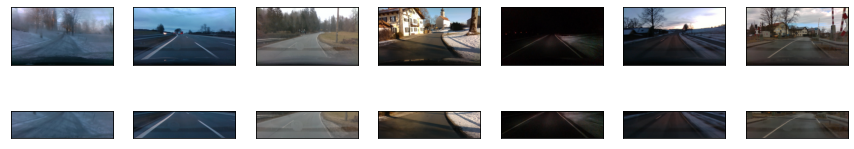

Dataset Mean Absolute SWA: 0.1764264593484284
Dataset Mean Absolute Normalized SWA: 0.49247628592128967
6396/6396 [==============================] - 624s 98ms/step - loss: 0.0663 - mse: 0.0663 - mae: 0.18567s - loss: 0.0666 - mse: 0.0666 - mae - ETA: 6s 
Model quality: 62.3%
Predictions: [[-0.45396936]]
Ground-truth (deg): -19.47
Prediction (denormed swa (deg)): -10.292933906448832
Predictions: [[-0.45396936]]
Ground-truth (deg): -19.47
Prediction (denormed swa (deg)): -10.292933906448832
Predictions: [[-0.45396936]]
Ground-truth (deg): -19.47
Prediction (denormed swa (deg)): -10.292933906448832
Predictions: [[-0.45396936]]
Ground-truth (deg): -19.47
Prediction (denormed swa (deg)): -10.292933906448832
Predictions: [[-0.45396936]]
Ground-truth (deg): -19.47
Prediction (denormed swa (deg)): -10.292933906448832



Starting Epoch 2 for all datasets
Dataset dataset_ma_norm_swa: 0.49815507368699885
Dataset dataset_ma_norm_swa: 0.49003761315968347
Dataset dataset_ma_norm_swa: 0.4925977722161

In [ ]:
model_name = 'v17.2'
epochs = 200

qualities = dict()

multi_train_dataset.denormalize_swa(0.5)

for epoch in range(epochs):
    print("Starting Epoch {} for all datasets".format(epoch+1))
    qualities["epoch-" + str(epoch)] = dict()
    
    naive_mae = multi_train_dataset.get_mean_absolute_swa()
    naive_norm_mae = multi_train_dataset.get_mean_absolute_normalized_swa()
    if epoch == 0:
        dataset_thumbs(multi_train_dataset)
        print("Dataset Mean Absolute SWA: {}".format(naive_mae))
        print("Dataset Mean Absolute Normalized SWA: {}".format(naive_norm_mae))
    hist = model.fit(multi_train_dataset, epochs=1, verbose=1, workers=4)#, use_multiprocessing=False, workers=1)
    model.save('./trained_models/' + model_name + "_epoch_" + str(epoch+1) + '.h5')
    
    
    model_mae = hist.history['mae'][-1]

    quality = 1 - (model_mae/naive_norm_mae)
    qualities["epoch-" + str(epoch)] = quality
    print("Model quality: {:.1f}%".format(100*quality))
        
    # Predict a couple as a sanity check
    for i in range(5):
        sample_idx = 100#random.randint(0, 10000)
        sample = multi_train_dataset.get_sample(sample_idx, augment=False, crop=True, normalize=False)
        cropped_frame = sample['frame']
        actual_swa = sample['swa']
        v_vehicle = sample['v_vehicle']
        blink_l = sample['blink_l']
        blink_r = sample['blink_r']
        timestamp = sample['filename']
        
        #cropped_frame = np.zeros_like(cropped_frame)
        #v_vehicle = 0
        #actual_swa = 0.5

        test_data = [np.array([cropped_frame]), np.array([v_vehicle/250])]
        predictions = model.predict(test_data)

        #predicted_swa = val_set.denormalize_swa(predictions[0][0])
        predicted_swa = predictions[0][0]
        denormed_pred_swa = multi_train_dataset.denormalize_swa(predicted_swa)
        print("Predictions: " + str(predictions))
        print("Ground-truth (deg): " +str(actual_swa))
        print("Prediction (denormed swa (deg)): " + str(denormed_pred_swa))
        
    print()
    #i = 1
    #for val_set in val_sets:
    #    loss = model.evaluate(val_set, verbose=1)
    #    predictions = model.predict(val_set, verbose=1)
    #    predictions_degrees = [x[0]*90 for x in predictions.tolist()]
    #    get_smoothness_score(predictions_degrees)
    #    #print("Validation Set {} loss: {}".format(i, loss))
    #    i+=1
        
    print()
    print()
    